# Chapter 3 problems 

In [1]:
using Distributions, PyPlot # We will be using those libraries 

## Social Networking problem


In [2]:
p=0.3; n=20 # paramaters

20

We do an want to verify that our degree distribution for a single node 
matched simulation. We first start with the closed form, theoretical 
calculation. 

In [3]:
dist_pmf(i)=binomial(n-1,i)*(1-p)^(n-1-i)*p^i

dist_pmf (generic function with 1 method)

In [4]:
dist_exact=map(dist_pmf,0:19);
sum(dist_exact) #Sanity check, probablity should add up to one

0.9999999999999988

The dist_pmf was caclulated from first principles. We could also use the Distributions.jl package 

In [5]:
dist_bn=Binomial(n-1,p)
dist_exact2=map(x->pdf(dist_bn,x),0:19);
sum((dist_exact-dist_exact2).^2) # Checking if they are identical 

2.189780993339573e-31

They are identical! No we try to do the same via simulaton 

In [6]:
function sn_sim(nIter)
    total_count=zeros(Int,n)
    for i=1:nIter
        count=0
        for j=1:n-1
            if rand()<p
                count+=1
            end
        end
        total_count[count+1]+=1 #The count+1 is because arrays are one based
    end
    total_count/nIter
end

sn_sim (generic function with 1 method)

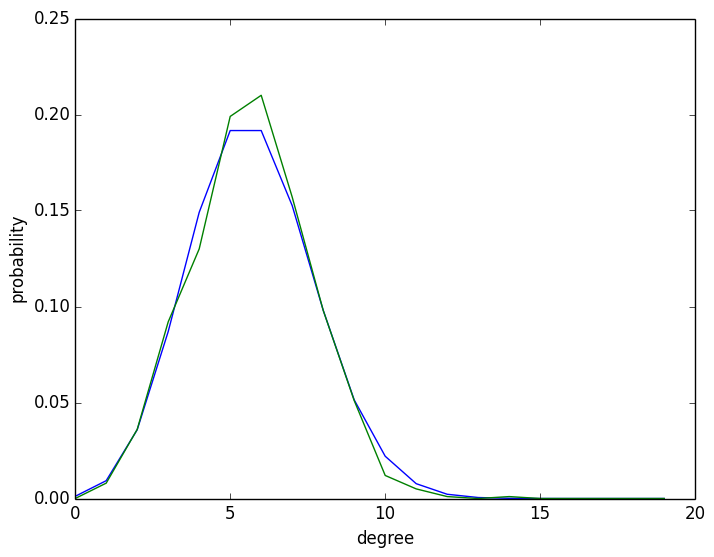

In [7]:
dist_sim=sn_sim(1000)
plot(0:n-1,dist_exact,0:n-1,dist_sim)
xlabel("degree")
ylabel("probability");

The match between theory and simulation can be improved by increasing the number of iterations.

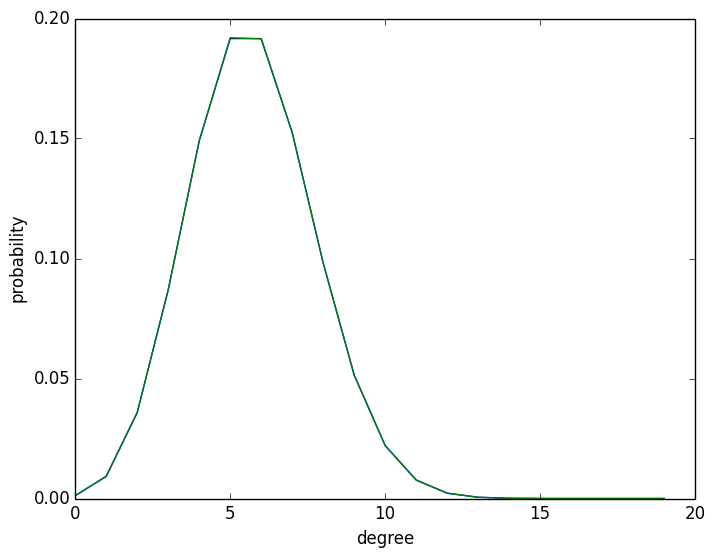

In [8]:
dist_sim=sn_sim(1000000)
plot(0:n-1,dist_exact,0:n-1,dist_sim)
xlabel("degree")
ylabel("probability");

Perfect match!

# We now do problem 7

In [9]:
p=0.1 # The probability of success 
bn=Binomial(200,p)
cdf(bn,24) #The sum of all probablities, just falling short of the 25 

0.8551059765109521

We verfity by simulaton 

In [10]:
function trucksim(nIter)
    total_count=0
    p=0.1
    for i=1:nIter
        count=0
        for j=1:200
            rand()<p && (count+=1)
        end
        count<25 && (total_count+=1)
    end
    total_count/nIter
end

trucksim (generic function with 1 method)

In [11]:
trucksim(1000_000)

0.854806

We do the simulaton as before, but we waits to get 25 observation. 
We also use this to get the distribution of number of vehicels before the number data is collected. 

In [12]:
function trucksim2(nIter) 
    total_count=0
    p=0.1
    count_total=zeros(Int,1000)
    for i=1:nIter
        count=0
        N=0
        while(count<25)
            N+=1
            rand()<p && (count+=1)
        end
        count_total[N]+=1
        N>200 && (total_count+=1)
    end
    total_count/nIter, count_total/nIter
end

trucksim2 (generic function with 1 method)

In [13]:
prob,truck_dist_sim=trucksim2(1000_000)

(0.855297,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

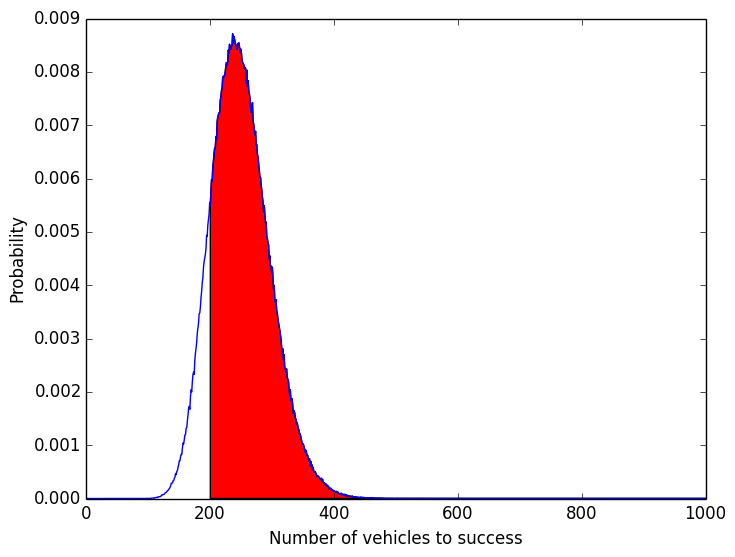

In [14]:
ax=subplot(1,1,1)
ax[:plot](1:1000,truck_dist_sim)
ax[:fill_between](201:1000,0,truck_dist_sim[201:1000],facecolor="red", interpolate=true)
xlabel("Number of vehicles to success")
ylabel("Probability");

We effectively calculated the area under the curve.

Can we also use the negative binomial distribution to do the same? First lets take a look at Julia's definition. 

In [15]:
?NegativeBinomial

search: NegativeBinomial



```
NegativeBinomial(r,p)
```

A *Negative binomial distribution* describes the number of failures before the `r`th success in a sequence of independent Bernoulli trials. It is parameterized by `r`, the number of successes, and `p`, the probability of success in an individual trial.

$$
P(X = k) = {k + r - 1 \choose k} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

The distribution remains well-defined for any positive `r`, in which case

$$
P(X = k) = \frac{\Gamma(k+r)}{k! \Gamma(r)} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

```julia
NegativeBinomial()        # Negative binomial distribution with r = 1 and p = 0.5
NegativeBinomial(r, p)    # Negative binomial distribution with r successes and success rate p

params(d)       # Get the parameters, i.e. (r, p)
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Negative binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Negative_binomial_distribution)


Now this does not look like the definition we had in our book. Here $X$ is counting the number of failures till the $r$th success is reached. In our book $X$ was the number trails (counting both successes and failures) till the $r$th success was reached. 

The Wikipedia articles warns that different textbook have slight different definition. 

Here we need to tranfore $$X_{\text{Julia}} \leftarrow X_{\text{Book}} -r$$

In [16]:
nb=NegativeBinomial(25,p)
1-cdf(nb,200-25)

0.8551059765109521

Now get get a perfect match! 
We can now do a nice graph using out negative binomial to compare it witht the simulation. 

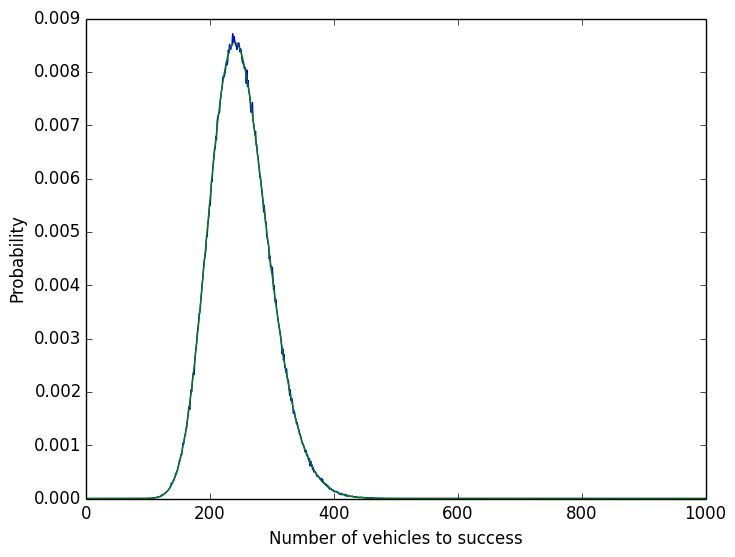

In [17]:
plot(1:1000,truck_dist_sim,1:1000,[pdf(nb,i-25) for i=1:1000]);
xlabel("Number of vehicles to success")
ylabel("Probability");

Looks like a pretty good match. 

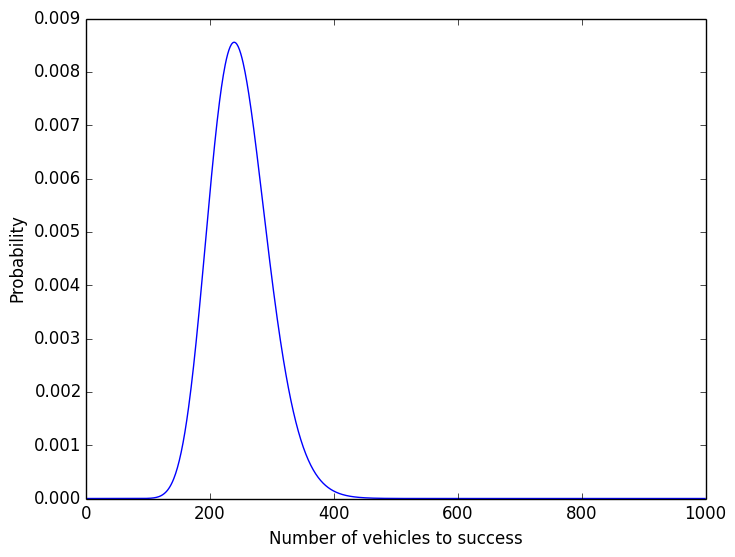

In [18]:
plot([pdf(nb,i-25) for i=1:1000]);
xlabel("Number of vehicles to success")
ylabel("Probability");

Just for clarrity the theoretical curve looks much more smoother than the simulation. As one would expect. 